# Mateo Serrato
## Práctica 3: DOR (DOCUMENT OCURRENCE REPRESENTATION)
### Ibero León

Counter({'0\n': 3759, '1\n': 1519})


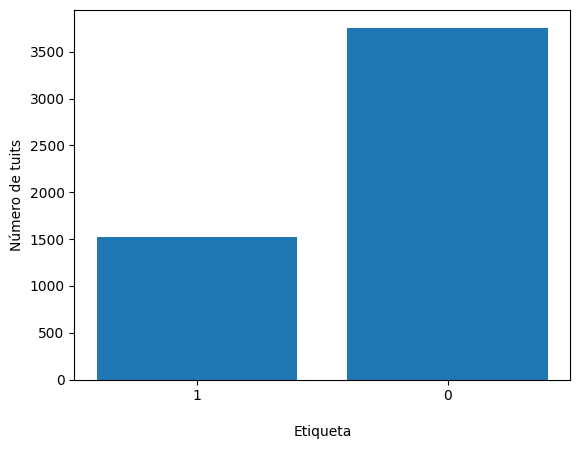

In [1]:
def get_text_from_files(path_corpus, path_truth):
    tr_text = [] #aqui van los tuits
    tr_labels = [] #aqui van las etiquetas

    with open(path_corpus, 'r', encoding='utf-8') as f_corpus, open(path_truth, 'r', encoding='utf-8') as f_truth:

        for twitt in f_corpus:
            tr_text += [twitt]

        for label in f_truth:
            tr_labels += [label]

    return tr_text, tr_labels

tr_text, tr_labels = get_text_from_files('./mex20_train.txt','mex20_train_labels.txt' )

from collections import Counter
import matplotlib.pyplot as plt

print(Counter(tr_labels))
plt.bar(Counter(tr_labels).keys(), Counter(tr_labels).values())
plt.ylabel('Número de tuits')
plt.xlabel('Etiqueta')


import nltk
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

corpus_palabras = []

for tweet in tr_text:
    corpus_palabras+= tokenizer.tokenize(tweet)



fdist = nltk.FreqDist(corpus_palabras)

import numpy as np
def sort_freq(fdist):
    aux = [(fdist[key], key) for key in fdist]
    aux.sort(reverse=True) 
    return aux

V = sort_freq(fdist)[:15000]  #las 10000 palabras más frecuentes


dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

## CALCULAR BOLSA DE PALABRAS: PERO EN VEZ DE BINARIA QUE REGISTRE FRECUENCIA

In [2]:
import numpy as np


def build_bow_tr(tr_text,V, dict_indices):
    tokenizer = TweetTokenizer()
    
    # Crear matriz vacía
    BOW = np.zeros((len(tr_text), len(V)), dtype=int)
    
    # Recorremos cada tweet
    cont_doc=0
    for i, tr in enumerate(tr_text):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr.lower()))
        for word in fdist_doc:
            if word in dict_indices:  #Si la palabra está en el vocabulario
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1
        
    

    return BOW





In [3]:
BOW_tr = build_bow_tr(tr_text, V, dict_indices)
BOW_tr
BOW_tr.shape

(5278, 15000)

In [4]:
BOW_tr.shape

(5278, 15000)

# DOR: Document Ocurrence Representation

In [5]:
#cuantas veces aparece el término en el documento multiplicado por el tamañoi del vocabulario total/vocabulario en el tuit 
import numpy as np

#MI VERSIÓN
"""
def compute_dor(TR):
    num_docs, tam_v = TR.shape
    DOR = np.zeros_like(TR, dtype=float)
    
    for i in range(num_docs): #i es el tuit
        palabras_doc = np.count_nonzero(TR[i, :])

        if palabras_doc == 0:
            palabras_doc = 1 #solo que aqui estamos alterando el df 
            DOR[i, :] = TR[i, :] * np.log(abs(tam_v) / palabras_doc) 
    
    return DOR

compute_dor(BOW_tr)
"""

def compute_dor(TR):
    num_docs, vocab_size = TR.shape
    # Creamos matriz con filas = palabras, columnas = documentos
    DTR = np.zeros((vocab_size, num_docs), dtype=np.float64)

    for i, doc in enumerate(TR):
        non_zero_positions = np.nonzero(doc)[0]
        tam_v = len(non_zero_positions)
        if tam_v == 0:
            tam_v = 1
        for term in non_zero_positions:
            # DTR[palabra, documento]
            DTR[term, i] = (max(doc[term],1)) * np.log10(vocab_size/tam_v)

    return DTR

In [6]:
DOR_base = compute_dor(BOW_tr)
DOR_base.shape


(15000, 5278)

### NORMALIZACIÓN

In [7]:
from sklearn import preprocessing

DOR_base = preprocessing.normalize(DOR_base,norm='l2')
DOR_base.shape

(15000, 5278)

### FEATURE SELECTION

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr,tr_labels)
best = feats.get_support(indices=True)
best

array([    0,     1,     2,     4,     5,     6,     7,    10,    11,
          12,    13,    17,    18,    19,    22,    24,    25,    28,
          30,    32,    36,    37,    38,    39,    41,    43,    44,
          48,    50,    53,    54,    56,    57,    58,    59,    61,
          63,    64,    65,    66,    67,    69,    70,    71,    78,
          79,    86,    88,    89,    92,    93,    94,    97,   100,
         102,   103,   104,   105,   107,   111,   114,   115,   116,
         117,   119,   120,   122,   123,   124,   128,   129,   131,
         133,   134,   136,   143,   147,   148,   150,   151,   153,
         154,   163,   166,   170,   177,   178,   179,   182,   183,
         184,   187,   188,   191,   198,   200,   209,   211,   217,
         221,   222,   225,   230,   231,   233,   236,   237,   240,
         243,   245,   246,   248,   249,   250,   252,   253,   257,
         260,   264,   265,   266,   271,   273,   279,   281,   284,
         285,   289,

In [9]:
dict_indices_invertido = {}
for w in dict_indices:
    dict_indices_invertido[dict_indices[w]] = w

dict_indices_invertido

{0: ',',
 1: 'de',
 2: 'que',
 3: '.',
 4: 'la',
 5: 'a',
 6: 'y',
 7: '!',
 8: 'no',
 9: '@USUARIO',
 10: 'me',
 11: 'el',
 12: 'en',
 13: 'se',
 14: 'es',
 15: 'con',
 16: '?',
 17: 'verga',
 18: 'los',
 19: 'madre',
 20: 'por',
 21: 'las',
 22: '"',
 23: 'un',
 24: 'te',
 25: 'mi',
 26: 'lo',
 27: 'putas',
 28: 'una',
 29: '...',
 30: 'putos',
 31: 'para',
 32: '😂',
 33: 'si',
 34: 'ya',
 35: 'como',
 36: 'su',
 37: 'pero',
 38: 'tu',
 39: 'loca',
 40: 'le',
 41: 'más',
 42: 'No',
 43: 'del',
 44: 'gorda',
 45: 'al',
 46: 'bien',
 47: 'A',
 48: '¿',
 49: 'Y',
 50: 'son',
 51: 'Me',
 52: 'o',
 53: 'feas',
 54: 'cuando',
 55: 'Que',
 56: ':',
 57: 'yo',
 58: 'les',
 59: 'porque',
 60: 'ni',
 61: 'está',
 62: 'ser',
 63: 'estoy',
 64: 'sus',
 65: 'todos',
 66: 'esta',
 67: 'puta',
 68: 'Ya',
 69: 'todo',
 70: 'pinche',
 71: 'puto',
 72: 'tan',
 73: 'Si',
 74: 'La',
 75: 'qué',
 76: '…',
 77: 'eso',
 78: 'muy',
 79: 'soy',
 80: 'hasta',
 81: 'así',
 82: '¡',
 83: '<URL>',
 84: 'mamar',


In [10]:
""" from collections import Counter
ids = DOR_base.flatten()
frecuencias = Counter(ids)
top_ids = []
for par in frecuencias.most_common(1000):
    id = par[0]
    top_ids.append(id)

top_ids
"""

target_words = [dict_indices_invertido[index] for index in best]
t_words = target_words
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])
target_matrix.shape

(1000, 5278)

In [11]:
target_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.0271329 ,
        0.0136944 ],
       [0.02763933, 0.        , 0.01548964, ..., 0.01548964, 0.        ,
        0.01463086],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
from sklearn.manifold import TSNE 
reduced_matrix = TSNE(n_components=2).fit_transform(target_matrix)
reduced_matrix

array([[-6.835764  , -0.8904364 ],
       [-7.494206  , -0.17462726],
       [-7.9326434 , -1.3185207 ],
       ...,
       [31.385475  , 49.20625   ],
       [14.177281  ,  7.3313594 ],
       [-4.845302  , 32.033535  ]], dtype=float32)

### VISUALIZACIÓN

In [13]:
reduced_matrix.shape

(1000, 2)

In [14]:
max_x = np.amax(reduced_matrix,axis=0)[0]


In [15]:
max_x

np.float32(54.43401)

In [16]:
max_y = np.amax(reduced_matrix,axis=0)[1]

In [17]:
max_y

np.float32(58.044384)

C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12

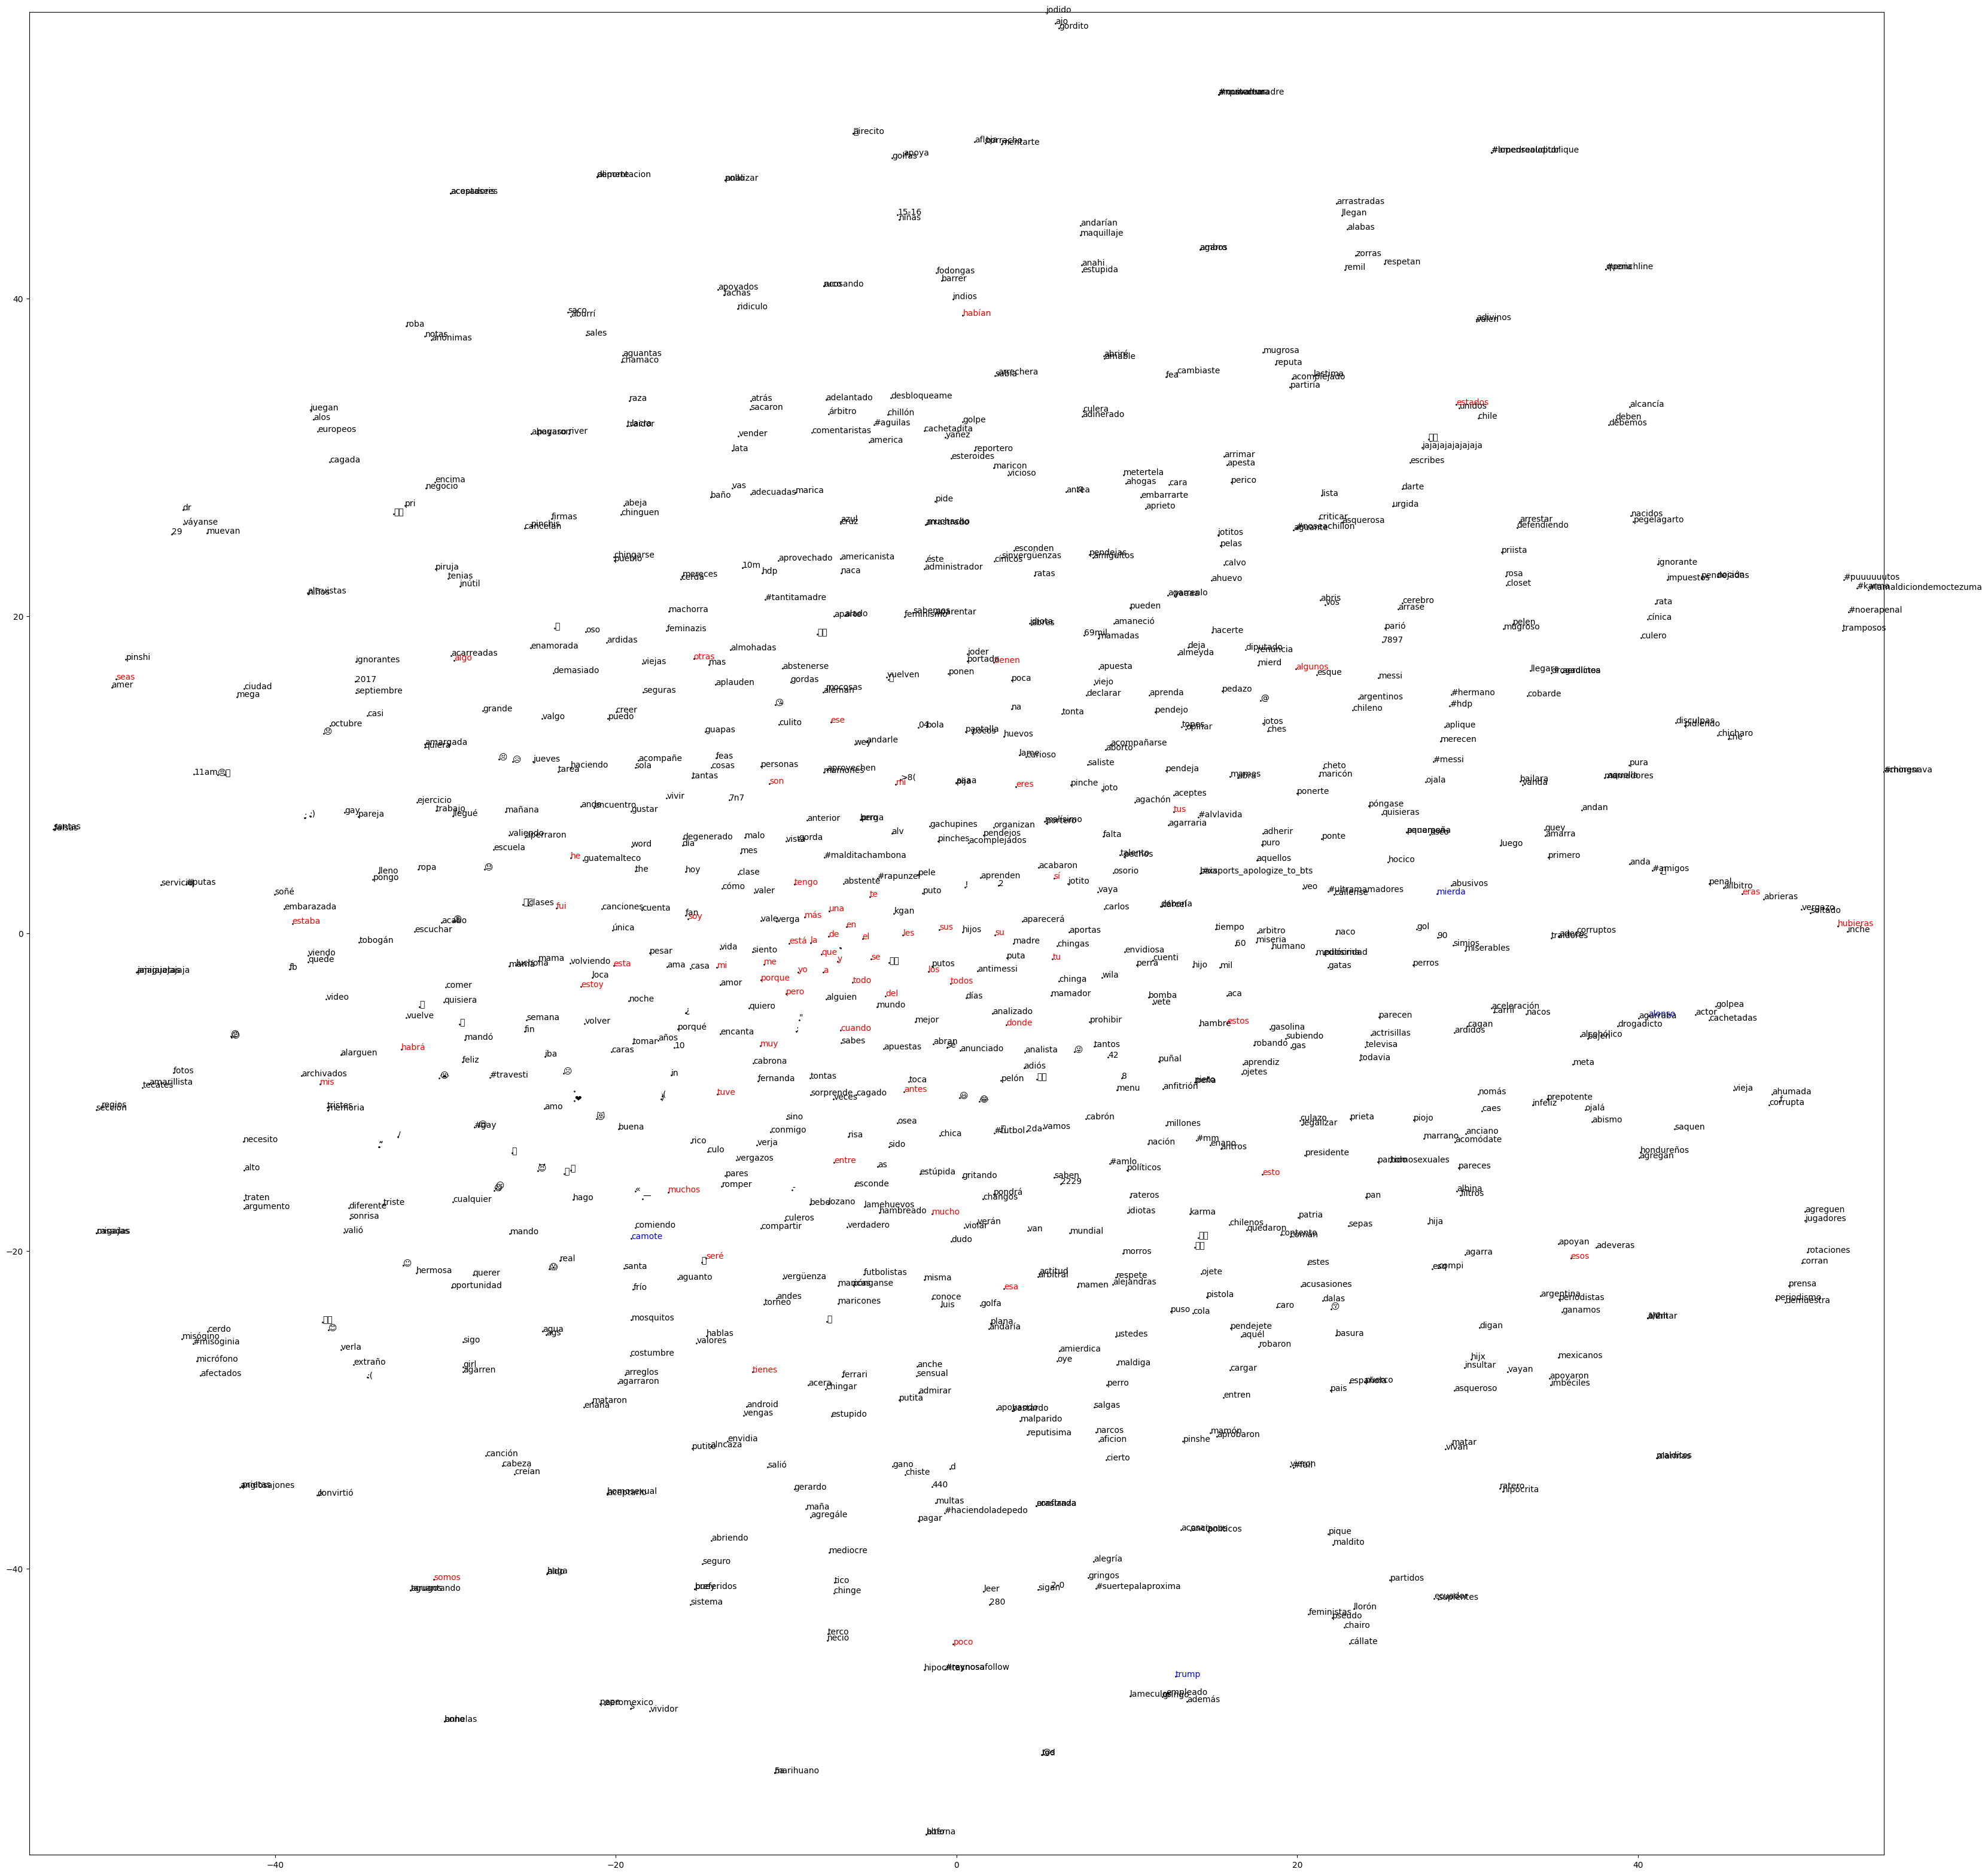

In [18]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(40,40),dpi=100)
plt.xlim((-max_x,max_x))
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:,0],reduced_matrix[:,1],1, color = 'black')

from nltk.corpus import stopwords
sw = set(stopwords.words('spanish'))

palabras_propias = [
    "Messi",
    "Juan",
    "Fernando",
    "Rodrigo",
    "Puto",
    "Papa",
    "Queso",
    "camote",
    "cebolla",
    "mierda",
    "alonso",
    "jesus",
    "trump",
    "claudia",
    "interestellar",
    "gpt",
    "alfonso"
]
#escribir nombre de la palabra
for idx, word in enumerate(t_words[:]):
    #coords para pintar la palabra
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    

    if word in sw:
        plt.annotate(word,(x,y),color = 'red')
    elif word in palabras_propias:
        plt.annotate(word,(x,y),color = 'blue')

    else:
        plt.annotate(word,(x,y),color = 'black')
    

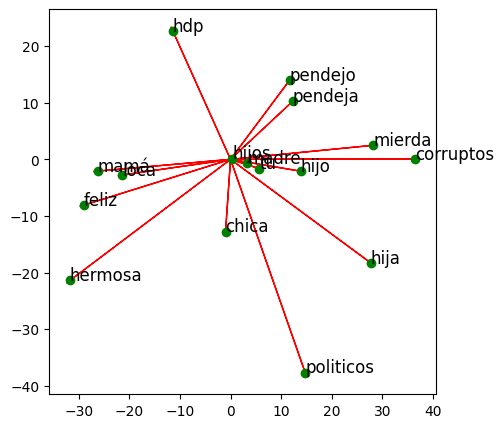

In [19]:
subsetwords = ["politicos", "corrupcion", "PRI", "feliz", "hermosa", 
               "chica", "tu", "hdp", "madre", "madres", "@usuario", 
               "hijos", "pendeja", "pendejo", "mierda", "loca", 
               "hijo", "hija", "mamá", "tia", "corruptos"]

# t_words es una lista de las mil palabras mejores segun Chi2
# reduced_matrix aqui estan las mil mejores palabras reducidas a 2D

subreduced_matrix = []
ploted_subset_words = []

for idx, word in enumerate(t_words[:]):
    if word in subsetwords: # Asegurarse que la palabra este en la lista
        ploted_subset_words += [word]
        subreduced_matrix += [reduced_matrix[idx]]    
        
subreduced_matrix = np.array(subreduced_matrix)

fig, ax = plt.subplots(figsize = (5,5))  #Lienzo de la grafica

for word in subreduced_matrix:
    ax.arrow(0, 0, word[0], word[1], head_width=0.8, head_length=0.8, 
             fc='red', ec='red', width=0.01)
    
ax.scatter(subreduced_matrix[:,0], subreduced_matrix[:,1], color='green')

# Dibujar etiquetas de las palabras
for i in range(0, len(ploted_subset_words)):
    ax.annotate(ploted_subset_words[i], 
                (subreduced_matrix[i,0], subreduced_matrix[i,1]), fontsize=12)

In [ ]:

texto = """ Clash Royale es un videojuego desarrollado por la empresa finlandesa Supercell y lanzado mundialmente el 2 de marzo de 2016. Desde su salida, el juego causó un gran impacto porque combinaba géneros que rara vez se habían mezclado en un mismo título: cartas coleccionables, defensa de torres y estrategia en tiempo real. Su diseño está pensado para partidas rápidas, adictivas y competitivas, lo que lo convirtió en un fenómeno dentro del mundo de los juegos móviles. El modelo de negocio es free-to-play, es decir, cualquiera puede descargarlo y jugarlo gratis, pero ofrece compras internas que aceleran la progresión o permiten obtener recompensas exclusivas.

La jugabilidad de Clash Royale se centra en armar un mazo de ocho cartas, que representan tropas, hechizos y estructuras. Cada carta tiene un coste en elixir, un recurso limitado que se regenera con el tiempo. Esto genera un componente estratégico muy fuerte: el jugador debe decidir qué cartas usar y en qué momento, ya que el mal manejo del elixir puede significar perder una torre en segundos. El campo de batalla está dividido en dos carriles y tres torres por bando: dos torres de princesas y una torre central del Rey. La partida puede ganarse de dos formas: derribando la torre del Rey (lo que otorga la victoria automática) o destruyendo más torres que el rival cuando finaliza el tiempo.

Las partidas duran generalmente tres minutos, aunque si terminan en empate se activa un tiempo extra con generación más rápida de elixir, lo que hace que el desenlace sea más intenso. La naturaleza corta de las batallas lo convierte en un juego perfecto para sesiones rápidas, pero al mismo tiempo ofrece profundidad suficiente para largas horas de práctica y mejora.

Clash Royale ofrece varios modos de juego además del clásico 1 contra 1. Existe el 2 contra 2, que requiere coordinación con un compañero; los torneos, donde se enfrentan jugadores de todo el mundo en igualdad de condiciones; los desafíos especiales, que imponen reglas distintas (como el Draft o el Modo Espejo); y las guerras de clanes, donde grupos de jugadores colaboran para obtener recompensas colectivas. El sistema de arenas y ligas también ha sido fundamental: los jugadores suben de arena a medida que ganan trofeos, desbloqueando nuevas cartas y recompensas, lo que mantiene la sensación de progreso constante.

Uno de los factores que explican el éxito y longevidad del juego es su escena competitiva. Desde 2017 se empezaron a organizar torneos internacionales, y en 2018 nació la Clash Royale League (CRL), la liga profesional oficial de Supercell. Esta liga reunió a los mejores equipos y jugadores del mundo, con transmisiones en vivo, comentaristas y premios millonarios. A lo largo de los años, el formato de la CRL ha cambiado, pasando de equipos organizados en regiones (Norteamérica, Europa, Asia, Latinoamérica) a un sistema más global, pero siempre manteniendo la idea de reunir a la élite del juego en competencias de alto nivel.

En términos de contenido, Supercell ha mantenido a Clash Royale fresco con actualizaciones constantes. De manera periódica se añaden nuevas cartas, se realizan ajustes de balance para evitar que ciertas estrategias dominen por completo, y se introducen modos de juego innovadores. En 2025, por ejemplo, se lanzó un modo experimental llamado Merge Tactics, que rompe con la dinámica clásica: aquí las partidas se juegan por turnos, las tropas pueden fusionarse para volverse más poderosas y el jugador administra el elixir de manera distinta, mientras que el combate ocurre de forma automática. Este tipo de innovaciones muestra cómo Supercell busca mantener vigente un juego con casi una década de vida.

En cuanto a la comunidad, Clash Royale cuenta con millones de jugadores activos cada mes alrededor del mundo. Ha creado una cultura propia de estrategias, creación de mazos y debates sobre cuáles son las mejores combinaciones de cartas según el meta de cada temporada. También es común que creadores de contenido y streamers dediquen canales enteros a analizar partidas, enseñar tácticas y mostrar mazos competitivos.

Con todo esto, Clash Royale se ha consolidado como uno de los juegos móviles más influyentes y exitosos de la historia. No solo ha generado miles de millones de dólares en ingresos para Supercell, sino que también ha marcado un antes y un después en cómo se entiende la estrategia en dispositivos móviles. Su mezcla de accesibilidad, complejidad estratégica, comunidad activa y soporte continuo le ha permitido seguir vigente después de casi diez años, algo que pocos títulos móviles logran"""



['clash',
 'royale',
 'es',
 'un',
 'videojuego',
 'desarrollado',
 'por',
 'la',
 'empresa',
 'finlandesa',
 'supercell',
 'y',
 'lanzado',
 'mundialmente',
 'el',
 'de',
 'marzo',
 'de',
 'desde',
 'su',
 'salida',
 'el',
 'juego',
 'causó',
 'un',
 'gran',
 'impacto',
 'porque',
 'combinaba',
 'géneros',
 'que',
 'rara',
 'vez',
 'se',
 'habían',
 'mezclado',
 'en',
 'un',
 'mismo',
 'título',
 'cartas',
 'coleccionables',
 'defensa',
 'de',
 'torres',
 'y',
 'estrategia',
 'en',
 'tiempo',
 'real',
 'su',
 'diseño',
 'está',
 'pensado',
 'para',
 'partidas',
 'rápidas',
 'adictivas',
 'y',
 'competitivas',
 'lo',
 'que',
 'lo',
 'convirtió',
 'en',
 'un',
 'fenómeno',
 'dentro',
 'del',
 'mundo',
 'de',
 'los',
 'juegos',
 'móviles',
 'el',
 'modelo',
 'de',
 'negocio',
 'es',
 'es',
 'decir',
 'cualquiera',
 'puede',
 'descargarlo',
 'y',
 'jugarlo',
 'gratis',
 'pero',
 'ofrece',
 'compras',
 'internas',
 'que',
 'aceleran',
 'la',
 'progresión',
 'o',
 'permiten',
 'obtener',
 '

In [ ]:

tokenizer = TweetTokenizer()
tokens = tokenizer.tokenize(texto.lower())
tokens





['clash',
 'royale',
 'es',
 'un',
 'videojuego',
 'desarrollado',
 'por',
 'la',
 'empresa',
 'finlandesa',
 'supercell',
 'y',
 'lanzado',
 'mundialmente',
 'el',
 'de',
 'marzo',
 'de',
 'desde',
 'su',
 'salida',
 'el',
 'juego',
 'causó',
 'un',
 'gran',
 'impacto',
 'porque',
 'combinaba',
 'géneros',
 'que',
 'rara',
 'vez',
 'se',
 'habían',
 'mezclado',
 'en',
 'un',
 'mismo',
 'título',
 'cartas',
 'coleccionables',
 'defensa',
 'de',
 'torres',
 'y',
 'estrategia',
 'en',
 'tiempo',
 'real',
 'su',
 'diseño',
 'está',
 'pensado',
 'para',
 'partidas',
 'rápidas',
 'adictivas',
 'y',
 'competitivas',
 'lo',
 'que',
 'lo',
 'convirtió',
 'en',
 'un',
 'fenómeno',
 'dentro',
 'del',
 'mundo',
 'de',
 'los',
 'juegos',
 'móviles',
 'el',
 'modelo',
 'de',
 'negocio',
 'es',
 'es',
 'decir',
 'cualquiera',
 'puede',
 'descargarlo',
 'y',
 'jugarlo',
 'gratis',
 'pero',
 'ofrece',
 'compras',
 'internas',
 'que',
 'aceleran',
 'la',
 'progresión',
 'o',
 'permiten',
 'obtener',
 '

In [45]:
#QUITAR RE 
import re #regular expression
texto_tokenizado = [word for word in tokens if re.match(r'^[a-záéíóúüñ]+$',word)]
texto_tokenizado

['clash',
 'royale',
 'es',
 'un',
 'videojuego',
 'desarrollado',
 'por',
 'la',
 'empresa',
 'finlandesa',
 'supercell',
 'y',
 'lanzado',
 'mundialmente',
 'el',
 'de',
 'marzo',
 'de',
 'desde',
 'su',
 'salida',
 'el',
 'juego',
 'causó',
 'un',
 'gran',
 'impacto',
 'porque',
 'combinaba',
 'géneros',
 'que',
 'rara',
 'vez',
 'se',
 'habían',
 'mezclado',
 'en',
 'un',
 'mismo',
 'título',
 'cartas',
 'coleccionables',
 'defensa',
 'de',
 'torres',
 'y',
 'estrategia',
 'en',
 'tiempo',
 'real',
 'su',
 'diseño',
 'está',
 'pensado',
 'para',
 'partidas',
 'rápidas',
 'adictivas',
 'y',
 'competitivas',
 'lo',
 'que',
 'lo',
 'convirtió',
 'en',
 'un',
 'fenómeno',
 'dentro',
 'del',
 'mundo',
 'de',
 'los',
 'juegos',
 'móviles',
 'el',
 'modelo',
 'de',
 'negocio',
 'es',
 'es',
 'decir',
 'cualquiera',
 'puede',
 'descargarlo',
 'y',
 'jugarlo',
 'gratis',
 'pero',
 'ofrece',
 'compras',
 'internas',
 'que',
 'aceleran',
 'la',
 'progresión',
 'o',
 'permiten',
 'obtener',
 '

In [55]:
#QUITAR SW
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))
stop_words.update(['clash','royale','juego']) #usar add para un solo elemento
texto_filtrado = [word for word in texto_tokenizado if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
fdist_clash = nltk.FreqDist(texto_filtrado)
fdist_clash

FreqDist({'cartas': 6, 'supercell': 5, 'tiempo': 5, 'jugadores': 5, 'torres': 4, 'partidas': 4, 'mundo': 4, 'móviles': 4, 'elixir': 4, 'puede': 3, ...})

In [60]:
fdist_clash['elixir']

4

# CREAR NUBE DE PALABRAS BÁSICA

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

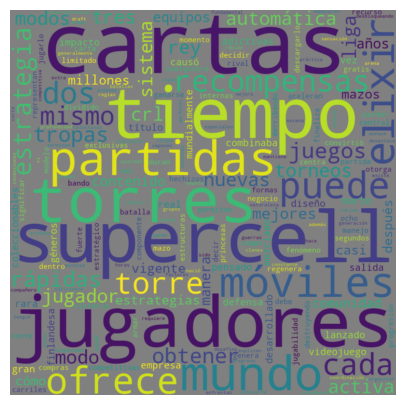

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=800,background_color='gray').generate_from_frequencies(fdist_clash)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')



In [86]:
#AHORA HAGAMOS UN WORDCLOUD DE LAS PALABRAS MÁS IMPORTANTES EXTRAIDAS DE LOS TWEETS USANDO CHI2

from sklearn.feature_selection import SelectKBest, chi2
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# =========================
# 1. Selección de features con Chi2
# =========================
feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr, tr_labels)
best_indices = feats.get_support(indices=True)
scores = feats.scores_[best_indices]  # importancias de Chi2
target_words = [dict_indices_invertido[i] for i in best_indices]

# Crear diccionario palabra -> score
word_importance = {}  # Creamos un diccionario vacío
for word, score in zip(target_words, scores):
    word_importance[word] = score  # Asignamos cada palabra como clave y su score como valor


In [93]:

# =========================
# 2. Filtrar palabras válidas y stopwords
# =========================
nltk.download('stopwords')
sw = set(stopwords.words('spanish'))
sw.discard("tu")
# Filtrar usando regex y stopwords
word_importance_filtrado = {w: s for w, s in word_importance.items() 
                            if re.match(r'^[a-záéíóüñ]+$', w) and w not in sw}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


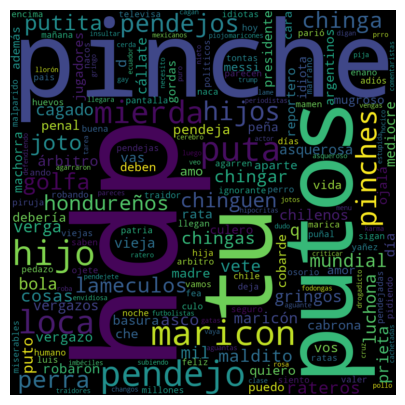

In [94]:

# =========================
# 3. Generar WordCloud
# =========================
wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(word_importance_filtrado)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()